In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import folium
%matplotlib inline

In [239]:
df_h = pd.read_csv('homicidiosHECHOS.csv', encoding='utf-8')  # Otras opciones: 'utf-8-sig', 'iso-8859-1'
df_v = pd.read_csv('homicidiosVICTIMAS.csv', encoding='utf-8')  # Otras opciones: 'utf-8-sig', 'iso-8859-1'
df_h.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Hacemos un análisis exploratorio de los datos con la libreria ydata-profiling 

In [240]:
""" # Generar el reporte
profile = ProfileReport(df_h, title='Reporte de EDA Hechos', explorative=True)

# Mostrar el reporte
profile.to_file('reporte_hechos.html') """

" # Generar el reporte\nprofile = ProfileReport(df_h, title='Reporte de EDA Hechos', explorative=True)\n\n# Mostrar el reporte\nprofile.to_file('reporte_hechos.html') "

## Estadísticas del Dataset

![Descripcion dataset hechos.png](<attachment:Descripcion dataset hechos.png>)
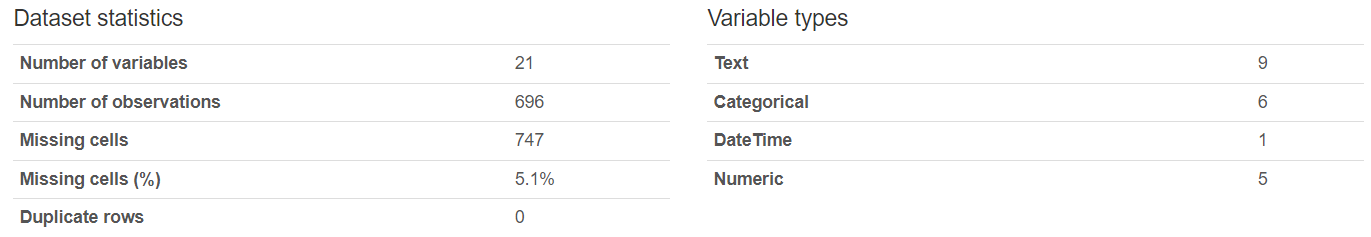

![Faltantes dataset hechos.png](<attachment:Faltantes dataset hechos.png>)
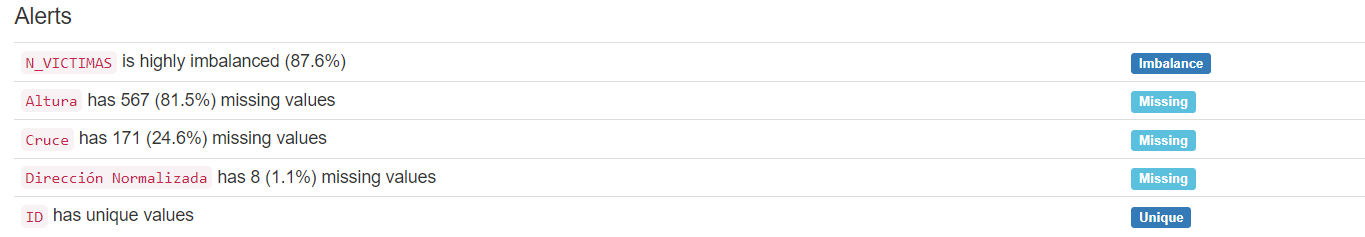

Del análisis podemos concluir que no hay valores duplicados en este dataset y también muy poca cantidad de nulos. Las columnas que más nulos tienen son "Altura" con el 81% de los registros y "Cruce" con el 25%. Procedemos a eliminarlas porque la ubicación se encuentra en otras columnas y conservaremos las demás por el momento. 

También vamos a eliminar la columna Hora porque no nos interesa el minuto exacto, y la hora ya está incluida en la columna HH. Lo mismo con el día.

In [241]:
df_h = df_h.drop(columns=['Cruce','Altura','HORA','DD'])

In [242]:
df_h.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Antes de hacer el primer analisis con ydata, eliminamos las columnas redundantes: Fecha, AAAA, MM, DD

Tambien cambiamos el tipo de dato de la columna EDAD. Le ponemos -1 a los valores sin datos para ver la distribución de edad de las víctimas

In [243]:
df_v = df_v.drop(columns=['AAAA','MM','DD'])
df_v['EDAD'].replace('SD', -1, inplace=True)
df_v['EDAD'] = df_v['EDAD'].astype(int)
df_v.head(3)

C:\Users\lucat\AppData\Local\Temp\ipykernel_26532\2773036149.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_v['EDAD'].replace('SD', -1, inplace=True)


,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016


In [244]:
""" # Generar el reporte
profile_victima = ProfileReport(df_v, title='Reporte de EDA Victimas', explorative=True)

# Mostrar el reporte
profile_victima.to_file('reporte_victima.html') """

" # Generar el reporte\nprofile_victima = ProfileReport(df_v, title='Reporte de EDA Victimas', explorative=True)\n\n# Mostrar el reporte\nprofile_victima.to_file('reporte_victima.html') "

## Estadísticas del Dataset

![Descripcion Dataset victimas.png](<attachment:Descripcion Dataset victimas.png>)
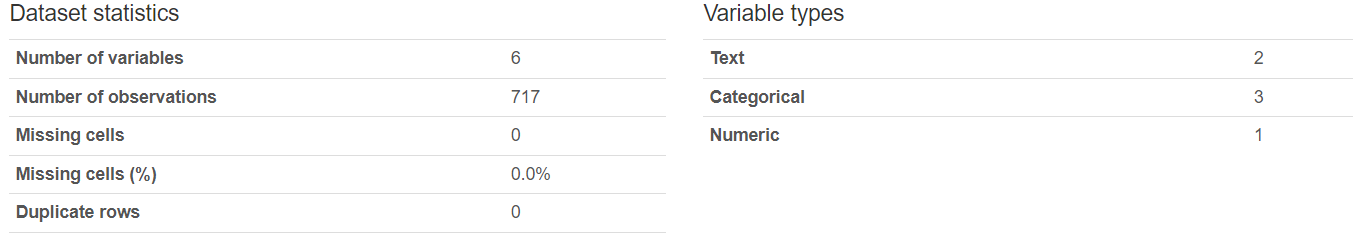

![Alertas dataset victimas.png](<attachment:Alertas dataset victimas.png>)
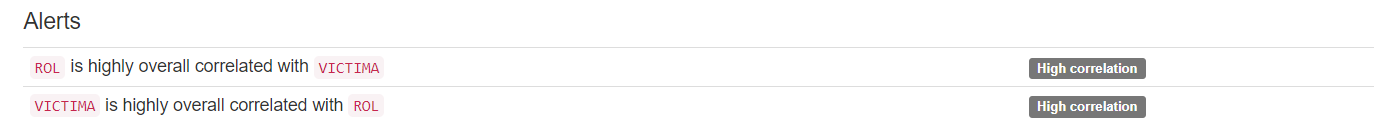

En este segundo Dataset observamos que tampoco hay filas duplicadas ni valores faltantes. Sin embargo, este dataset es ligeramente más extenso al anteior (717 vs 696) debido al hecho de que en algunos siniestros la cantidad de víctimas es mayor a uno y eso se desglosa en este segundo dataset. Vamos a chequear esta hipótesis sumando los valores de la columna N_Victimas del dataset de hechos. 

In [245]:
df_h['N_VICTIMAS'] = df_h['N_VICTIMAS'].astype(int)
Suma_victimas = df_h['N_VICTIMAS'].sum()
Suma_victimas

717

Como podemos observar, cuando sumamos el número de víctimas coincide con el número de filas del Dataset anterior

Ahora vamos a analizar los primeros gráficos que arrojo el EDA automático sobre la distribución de los datos. Luego vamos a contrastarlo con la suma de las víctimas totales que, como ya hemos dicho, es levemente superior. 

### Distribución de los hechos por tipo de calle

![Distribución por via .png](<attachment:Distribución por via .png>)
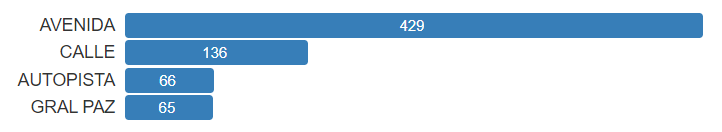

In [246]:
victimas_por_calle = df_h.groupby('TIPO_DE_CALLE')['N_VICTIMAS'].sum().sort_values(ascending= False)
victimas_por_calle

TIPO_DE_CALLE
AVENIDA      442
CALLE        138
GRAL PAZ      69
AUTOPISTA     68
Name: N_VICTIMAS, dtype: int32

In [247]:
print(f" Entre avenida y calle obtenemos el {round((victimas_por_calle['AVENIDA'] + victimas_por_calle['CALLE'])/victimas_por_calle.sum()*100,2)}% de las víctimas según el tipo de calle.")

 Entre avenida y calle obtenemos el 80.89% de las víctimas según el tipo de calle.


### Distribución de los hechos por tipo de víctima

![Distribución victima.png](<attachment:Distribución victima.png>)
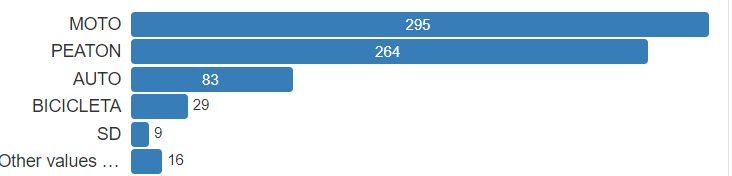

In [248]:
tipo_victimas = df_h.groupby('VICTIMA')['N_VICTIMAS'].sum().sort_values(ascending= False)
tipo_victimas

VICTIMA
MOTO           302
PEATON         266
AUTO            92
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            3
OBJETO FIJO      2
PEATON_MOTO      2
Name: N_VICTIMAS, dtype: int32

In [249]:
print(f" Entre peatón y moto obtenemos el {round((tipo_victimas['MOTO'] + tipo_victimas['PEATON'])/tipo_victimas.sum()*100,2)}% de las víctimas por tipo de víctima.")

 Entre peatón y moto obtenemos el 79.22% de las víctimas por tipo de víctima.


### Distribución de los hechos por tipo de acusado

![Distribucion acusados.png](<attachment:Distribucion acusados.png>)
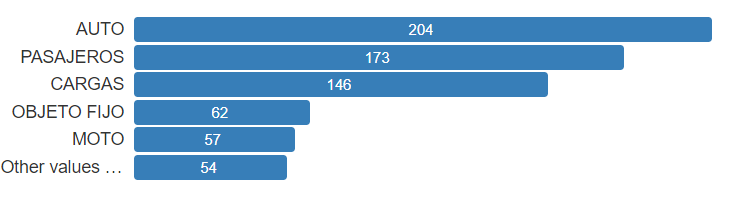

In [250]:
victimas_por_acusado = df_h.groupby('ACUSADO')['N_VICTIMAS'].sum().sort_values(ascending= False)
victimas_por_acusado

ACUSADO
AUTO           210
PASAJEROS      178
CARGAS         150
OBJETO FIJO     67
MOTO            58
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: N_VICTIMAS, dtype: int32

In [251]:
print(f" Entre auto, pasajeros y cargas obtenemos el {round((victimas_por_acusado['AUTO'] + victimas_por_acusado['PASAJEROS']+ victimas_por_acusado['CARGAS'])/victimas_por_acusado.sum()*100,2)}% de los acusados.")

 Entre auto, pasajeros y cargas obtenemos el 75.03% de los acusados.


Como podemos observar a partir de estos tres análisis, las tres divisiones que hicimos respecto de los hechos cuentan con una gran concentración en máximo tres variables. Por parte del lugar la concentración se da en Avenidas y Calles (80%), en cuanto a la víctima son mayoritariamente peatones y motociclistas(79%) y en cuanto a los causantes de los hechos encontramos el 75% entre auto, pasajeros y cargas. 

## Ahora analizaremos la distribución temporal y espacial de los datos.

### Hechos por Año

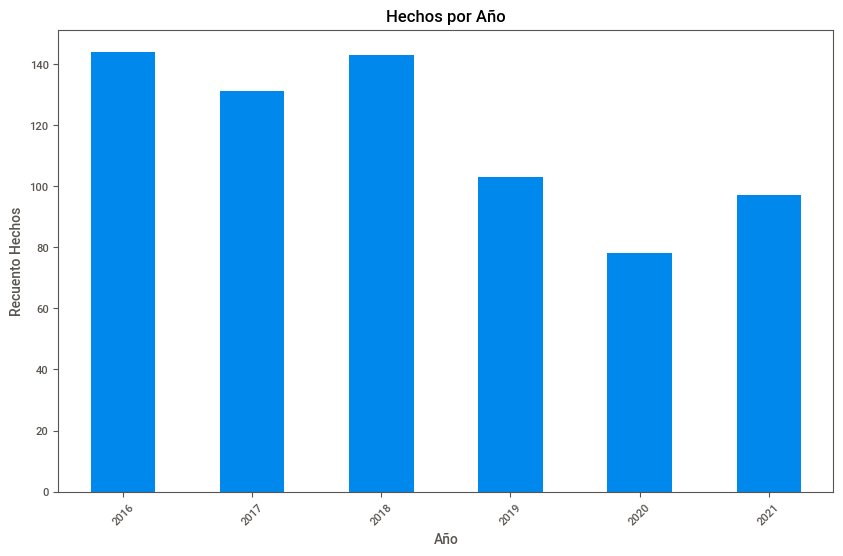

In [252]:
data_año = df_h.groupby('AAAA')['ID'].count()

plt.figure(figsize=(10, 6))
data_año.plot(kind='bar')
plt.title('Hechos por Año')
plt.xlabel('Año')
plt.ylabel('Recuento Hechos')
plt.xticks(rotation=45)
plt.show()

A partir del gráfico observado, podríamos alegar que en los años más recientes hubo un descenso de hechos con víctimas fatales, sin embargo esto no sería correcto debido a que los años 2020 y 2021 fueron los años con cuarentena por el virus COVID lo que llevó a una disminución de movimiento en las calles y, consecuentemente, un descenso en la cantidad de accidentes.

### Hechos por Mes

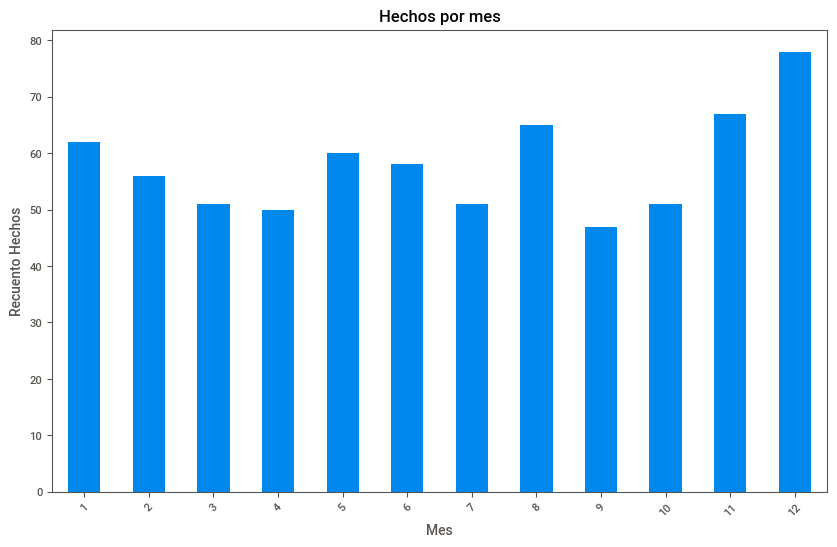

In [253]:
data_meses = df_h.groupby('MM')['ID'].count()

plt.figure(figsize=(10, 6))
data_meses.plot(kind='bar')
plt.title('Hechos por mes')
plt.xlabel('Mes')
plt.ylabel('Recuento Hechos')
plt.xticks(rotation=45)
plt.show()

In [254]:
df_h['HH'].replace('SD', -1, inplace=True)
df_h['HH'] = df_h['HH'].astype(int)

C:\Users\lucat\AppData\Local\Temp\ipykernel_26532\243228360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_h['HH'].replace('SD', -1, inplace=True)


### Hechos por Hora

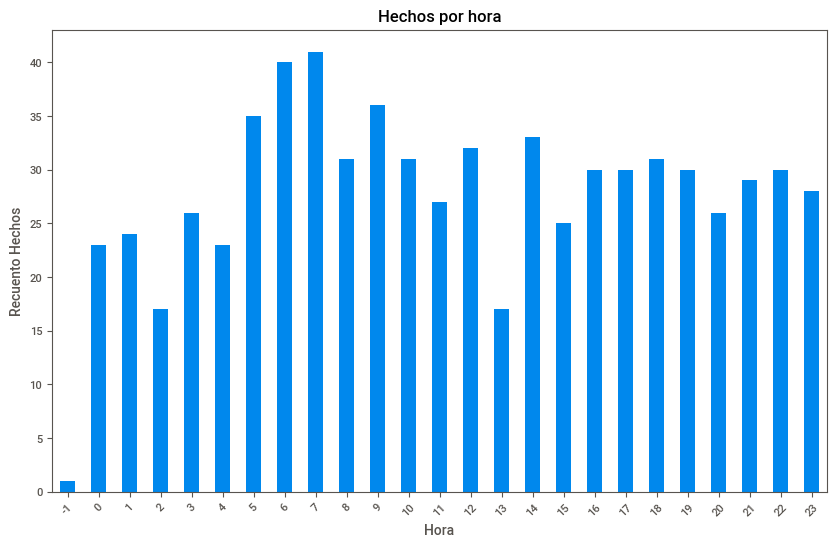

In [255]:
data_hora = df_h.groupby('HH')['ID'].count()

plt.figure(figsize=(10, 6))
data_hora.plot(kind='bar')
plt.title('Hechos por hora')
plt.xlabel('Hora')
plt.ylabel('Recuento Hechos')
plt.xticks(rotation=45)
plt.show()

En estos dos últimos gráficos podemos ver que la distribución no es uniforme y diciembre es el mes del año que más accidentes registra. Por su parte el horario con más accidentes es el de las 6 y las 7 de la mañana. Ahora vamos a obtener el día de la semana según la fecha registrada para ver la distribución a lo largo de la misma.  

In [256]:
# Convertir la columna 'fecha' a datetime
df_h['FECHA'] = pd.to_datetime(df_h['FECHA'])

# Obtener el nombre del día de la semana
df_h['dia'] = df_h['FECHA'].dt.day_name()

In [257]:
df_h.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,dia
0,2016-0001,1,2016-01-01,2016,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Friday
1,2016-0002,1,2016-01-02,2016,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,Saturday
2,2016-0003,1,2016-01-03,2016,1,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,Sunday


### Hechos por día de la semana

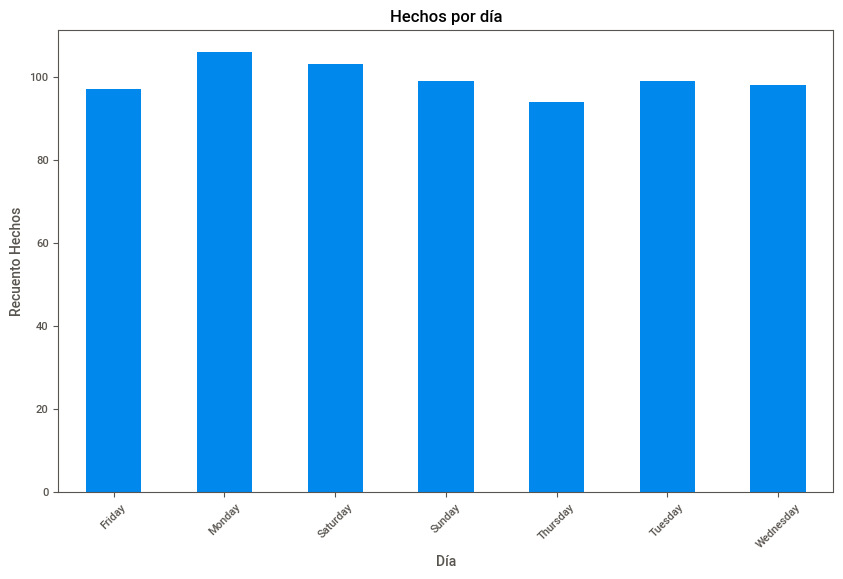

In [258]:
data_dia = df_h.groupby('dia')['ID'].count()

plt.figure(figsize=(10, 6))
data_dia.plot(kind='bar')
plt.title('Hechos por día')
plt.xlabel('Día')
plt.ylabel('Recuento Hechos')
plt.xticks(rotation=45)
plt.show()

En principio, la distribución es uniforme, veremos que sucede en la segunda etapa del análisis con los gráficos interactivos que nos permitirán segmentar más adecuadamente los hechos.

### Ahora graficaremos las coordenadas de los hechos con la latitud y longitud. 

In [259]:
# Función para limpiar y convertir valores
def safe_float_conversion(val):
    try:
        # Reemplazar coma por punto y convertir a float
        return float(val.replace(',', '.'))
    except ValueError:
        # Manejar valores no válidos, por ejemplo, devolviendo None o 0
        return None

# Aplicar la función de limpieza y conversión
df_h['latitud'] = df_h['pos y']
df_h['longitud'] = df_h['pos x']
df_h['latitud'] = df_h['latitud'].apply(safe_float_conversion)
df_h['longitud'] = df_h['longitud'].apply(safe_float_conversion)

df_h.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,dia,latitud,longitud
0,2016-0001,1,2016-01-01,2016,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Friday,-34.687570,-58.475340
1,2016-0002,1,2016-01-02,2016,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,Saturday,-34.669777,-58.508775
2,2016-0003,1,2016-01-03,2016,1,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,Sunday,-34.631894,-58.390403


In [260]:
df_h.isna().sum()

ID                        0
N_VICTIMAS                0
FECHA                     0
AAAA                      0
MM                        0
HH                        0
LUGAR_DEL_HECHO           0
TIPO_DE_CALLE             0
Calle                     1
Dirección Normalizada     8
COMUNA                    0
XY (CABA)                 0
pos x                     0
pos y                     0
PARTICIPANTES             0
VICTIMA                   0
ACUSADO                   0
dia                       0
latitud                  12
longitud                 12
dtype: int64

In [261]:
df_mapa = df_h.dropna(subset=['latitud','longitud'], how='all')

Dropeamos las coordenadas que nos da error para poder graficar el primer mapa.

In [262]:
# Crear un mapa centrado en el primer punto
mapa = folium.Map(location=[df_mapa['latitud'][0], df_mapa['longitud'][0]], zoom_start=5)

# Añadir marcadores para cada punto
for idx, row in df_mapa.iterrows():
    folium.Marker(
        location=[row['latitud'], row['longitud']],
        popup=row['ID']
    ).add_to(mapa)

mapa

## Distribución de edad y género de las víctimas

Ahora veremos la distribución de los datos del otro data set antes de pasar a los gráficos interactivos. De aquí extraeremos dos datos: género y edad.

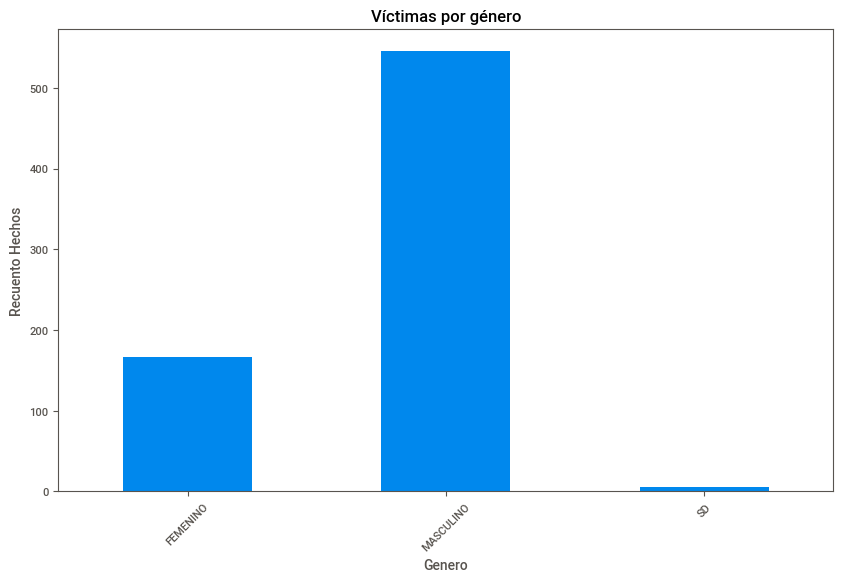

In [263]:
data_genero = df_v.groupby('SEXO')['ID_hecho'].count()

plt.figure(figsize=(10, 6))
data_genero.plot(kind='bar')
plt.title('Víctimas por género')
plt.xlabel('Genero')
plt.ylabel('Recuento Hechos')
plt.xticks(rotation=45)
plt.show()

C:\Users\lucat\AppData\Local\Temp\ipykernel_26532\894592763.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edad['rango_edad'] = pd.cut(df_edad['EDAD'], bins=bins, labels=labels, right=False)
C:\Users\lucat\AppData\Local\Temp\ipykernel_26532\894592763.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_edad = df_edad.groupby('rango_edad')['ID_hecho'].count()


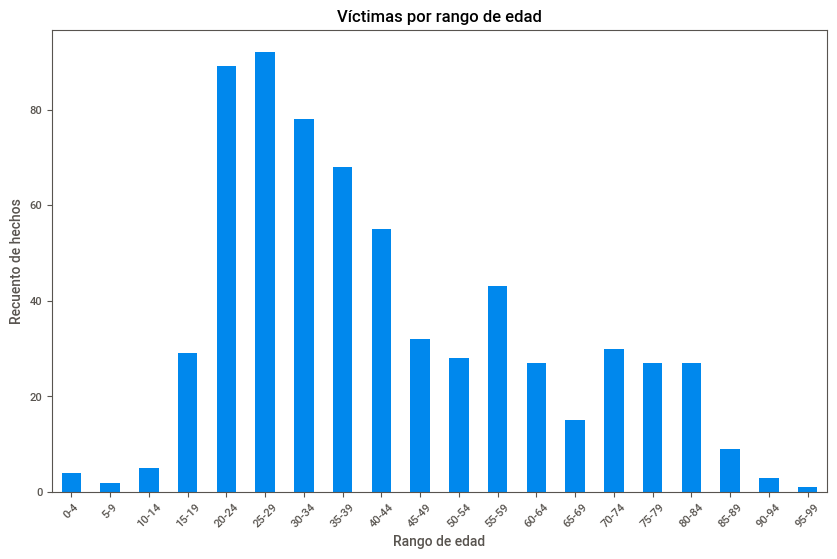

In [264]:
#Excluimos los que no tenemos data para no alterar la distribución. 
df_edad = df_v[df_v['EDAD']!=-1]

bins = range(0, 101, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
# Crear una nueva columna con los rangos de edad
df_edad['rango_edad'] = pd.cut(df_edad['EDAD'], bins=bins, labels=labels, right=False)

# Agrupar por los rangos de edad y contar los ID_hecho
data_edad = df_edad.groupby('rango_edad')['ID_hecho'].count()

# Graficar los datos
plt.figure(figsize=(10, 6))
data_edad.plot(kind='bar')
plt.title('Víctimas por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Recuento de hechos')
plt.xticks(rotation=45)
plt.show()

En la distribución de la edad si vemos una clara preponderancia para las edades 20-24 y 25-29 observando un descenso a partir de las mismas a medida que la edad avanza. 

In [265]:
df_v.describe()

,EDAD
count,717.000000
mean,38.976290
std,22.143154
min,-1.000000
25%,24.000000
50%,35.000000
75%,55.000000
max,95.000000


In [266]:
df_h.describe()

,N_VICTIMAS,FECHA,AAAA,MM,HH,COMUNA,latitud,longitud
count,696.000000,696,696.000000,696.000000,696.000000,696.000000,684.000000,684.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,11.639368,7.425287,-34.619632,-58.441545
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,-1.000000,0.000000,-34.705250,-58.529942
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,6.000000,4.000000,-34.643689,-58.476218
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,11.000000,8.000000,-34.622928,-58.444513
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,17.250000,11.000000,-34.596799,-58.401841
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,23.000000,15.000000,-34.534654,-58.356082
std,0.179393,NaN,1.683754,3.571309,6.712437,4.387050,0.035289,0.046144


In [ ]:
df_v.to_csv('df_victimas.csv')
df_h.to_csv('df_hechos.csv')
df_mapa.to_csv('df_mapa.csv')

df = pd.read_csv('df_victimas.csv')
#Hacemos una tabla solo de fechas para calcular los kpis
df_fecha = df[['ID_hecho', 'FECHA']]
df_fecha.to_csv('df_fechas.csv')

# Conclusiones preeliminares:

En base a todo el análisis llevado a cabo hemos observado los siguientes datos: 
1. La distribución de víctimas presenta la siguiente concentración:
    * La gran mayoría son hombres, motociclista o peatones. Y los hechos ocurren principalmente en calles o avenidas. 
    * Si agrupamos por edad observamos que la mayoría de las víctimas se encuentran entre los 20 y los 45 años. 
2. La distribución temporal de los hechos tiene una leve concentración en los horarios 6 y 7 de la mañana. Sin embargo no encontramos ningún tipo de distribución anormal en cuanto a los días de la semana. Hay una leve concentración de hechos en diciembre por sobre los demás meses. 
3. Los acusados de los hechos se concentran principalmente en tres categorías: Auto, Pasajeros y Vehículos de Carga. 

### Creamos las tablas para calcular los KPIs en PowerBI

#### Dataframe para el KPI N°1: víctimas totales

In [ ]:
df = pd.read_csv('df_victimas.csv')
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')

# Extraer el año de la columna 'FECHA' y guardarlo en una nueva columna 'año'
df['año'] = df['FECHA'].dt.year
df['semestre'] = ((df['FECHA'].dt.month - 1) // 6) + 1
df = df[['año','semestre','ID_hecho']]
df
df_grouped = df.groupby(['año', 'semestre']).size().reset_index(name='cantidad')

# Ordenar por 'año' y 'semestre' para calcular la diferencia porcentual
df_grouped = df_grouped.sort_values(by=['año', 'semestre'])

# Calcular la diferencia porcentual semestre a semestre
df_grouped['diferencia_pct'] = df_grouped['cantidad'].pct_change()

# Llenar los valores NaN con 0 (opcional)
df_grouped['diferencia_pct'] = df_grouped['diferencia_pct'].fillna(0)

# Mostrar el DataFrame resultante
df_grouped.to_csv('dif_semestre.csv')
df_grouped

#### Dataframe para el KPI N°2: víctimas motociclistas

In [7]:
df = pd.read_csv('df_victimas.csv')
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')

# Extraer el año de la columna 'FECHA' y guardarlo en una nueva columna 'año'
df['año'] = df['FECHA'].dt.year
df_moto = df[df['VICTIMA']=='MOTO']

df_grouped = df_moto.groupby(['año']).size().reset_index(name='cantidad')

# Ordenar por 'año' y 'semestre' para calcular la diferencia porcentual
df_grouped = df_grouped.sort_values(by=['año'])

# Calcular la diferencia porcentual semestre a semestre
df_grouped['diferencia_pct'] = df_grouped['cantidad'].pct_change()

# Llenar los valores NaN con 0 (opcional)
#df_grouped['diferencia_pct'] = df_grouped['diferencia_pct'].fillna(0)

# Mostrar el DataFrame resultante
df_grouped.to_csv('dif_motos.csv')

,Unnamed: 0,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,año
0,0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016,2016
1,1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016,2016
2,2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016,2016
3,3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,SD,2016
4,4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016,2016
...,...,...,...,...,...,...,...,...,...
712,712,2021-0092,2021-12-12,PEATON,PEATON,FEMENINO,50,12/12/2021,2021
713,713,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,12/18/2021,2021
714,714,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,12/20/2021,2021
715,715,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27,1/2/2022,2021


#### Dataframe para el KPI N°3: acusado pasajeros y cargas

Este tercer KPI buscará reducir en un 10% anual la cantidad de víctimas fatales en los que el acusado fue un vehículo de pasajeros o de cargas. Entendemos que, al pertenecer dichos acusados a empresas de transporte, es posible coordinar políticas desde el estado para reducir la incidencia de estos actores en los hechos. 

In [13]:
df = pd.read_csv('df_hechos.csv')
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')

# Extraer el año de la columna 'FECHA' y guardarlo en una nueva columna 'año'
df['año'] = df['FECHA'].dt.year
df_acusados = df[(df['ACUSADO'] == 'PASAJEROS') | (df['ACUSADO'] == 'CARGAS')]

df_grouped = df_acusados.groupby('año')['N_VICTIMAS'].sum().reset_index(name='cantidad')

# Ordenar por 'año' y 'semestre' para calcular la diferencia porcentual
df_grouped = df_grouped.sort_values(by=['año'])

# Calcular la diferencia porcentual semestre a semestre
df_grouped['diferencia_pct'] = df_grouped['cantidad'].pct_change()


df_grouped.to_csv('df_acusados.csv')